## **Loading Modules**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

## **Loading Dataset**

In [45]:
train = pd.read_csv("train.csv")

## **EDA**

In [46]:
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [47]:
train.info()

train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [48]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Melihat pengaruh suatu variable terhadap label

In [49]:
pindah = train[train["Transported"] == True]
gapindah = train[train["Transported"] == False]

print ("Transported = %i (%.1f%%)" %(len(pindah), float(len(pindah)) / len(train) * 100.0))
print ("Not Transported = %i (%.1f%%)" %(len(gapindah) , float(len(gapindah)) / len(train) * 100.0))
print ("Total data = %i" %len(train))

Transported = 4378 (50.4%)
Not Transported = 4315 (49.6%)
Total data = 8693


VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: Transported, dtype: int64

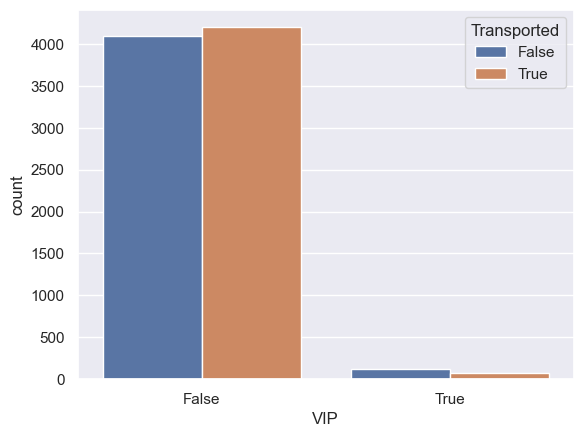

In [50]:
sns.countplot(x = "VIP", hue = "Transported", data = train)

train.groupby("VIP").Transported.value_counts()

In [51]:
train[["VIP", "Transported"]].groupby(["VIP"], as_index = True).mean()

,Transported
VIP,
False,0.506332
True,0.381910


CryoSleep  Transported
False      False          3650
           True           1789
True       True           2483
           False           554
Name: Transported, dtype: int64

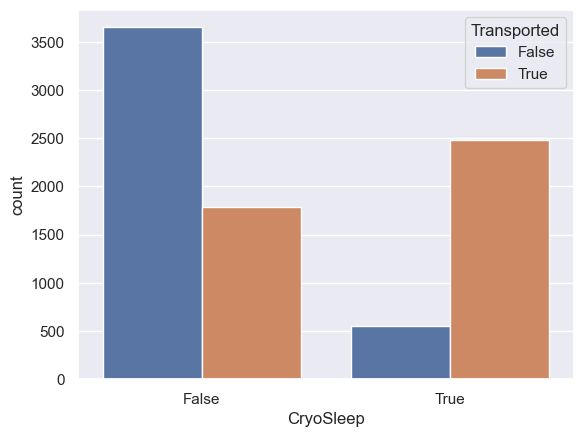

In [52]:
sns.countplot(x = "CryoSleep", hue = "Transported", data = train)

train.groupby("CryoSleep").Transported.value_counts()

In [53]:
train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=True).mean()

,Transported
CryoSleep,
False,0.328921
True,0.817583


Bisa dilihat dari data tersebut bahwa jika status CryoSleep nya false maka kemungkinan passager ter transported lebih kecil dibandingkan dengan passsager yang status CryoSleepnya true

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: Transported, dtype: int64

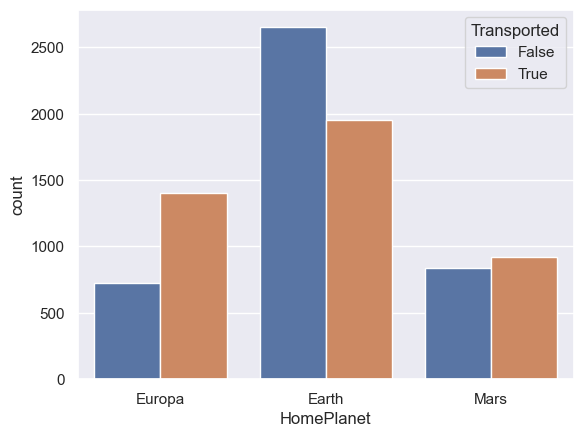

In [54]:
sns.countplot(x = "HomePlanet", hue = "Transported", data = train)

train.groupby("HomePlanet").Transported.value_counts()

In [55]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=True).mean()

,Transported
HomePlanet,
Earth,0.423946
Europa,0.658846
Mars,0.523024


<AxesSubplot:xlabel='Age', ylabel='Count'>

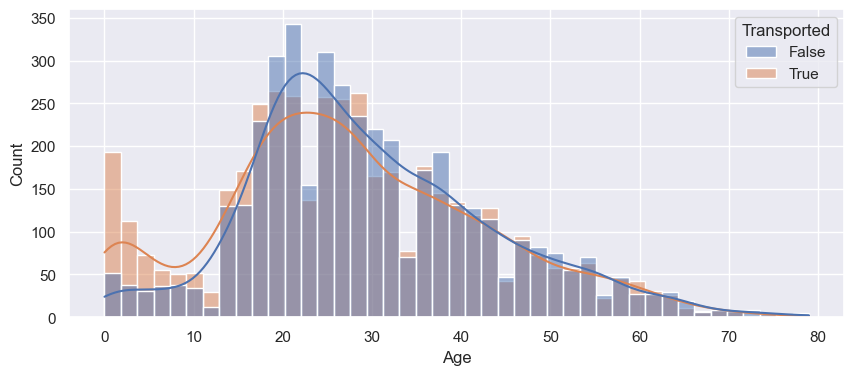

In [56]:
plt.figure(figsize = (10, 4))
sns.histplot(x = "Age", hue = "Transported",data = train, kde = True)

Berdasarkan data histogram ini dapat disimpulkan bahwa passager dengan umur 1 - 20 tahun memiliki kemungkinan ter transported lebih besar dibandingkan umur 20 - 40 tahun dan pada umur diatas 40 tahun, kemungkinan untuk ter transported adalah 50 : 50

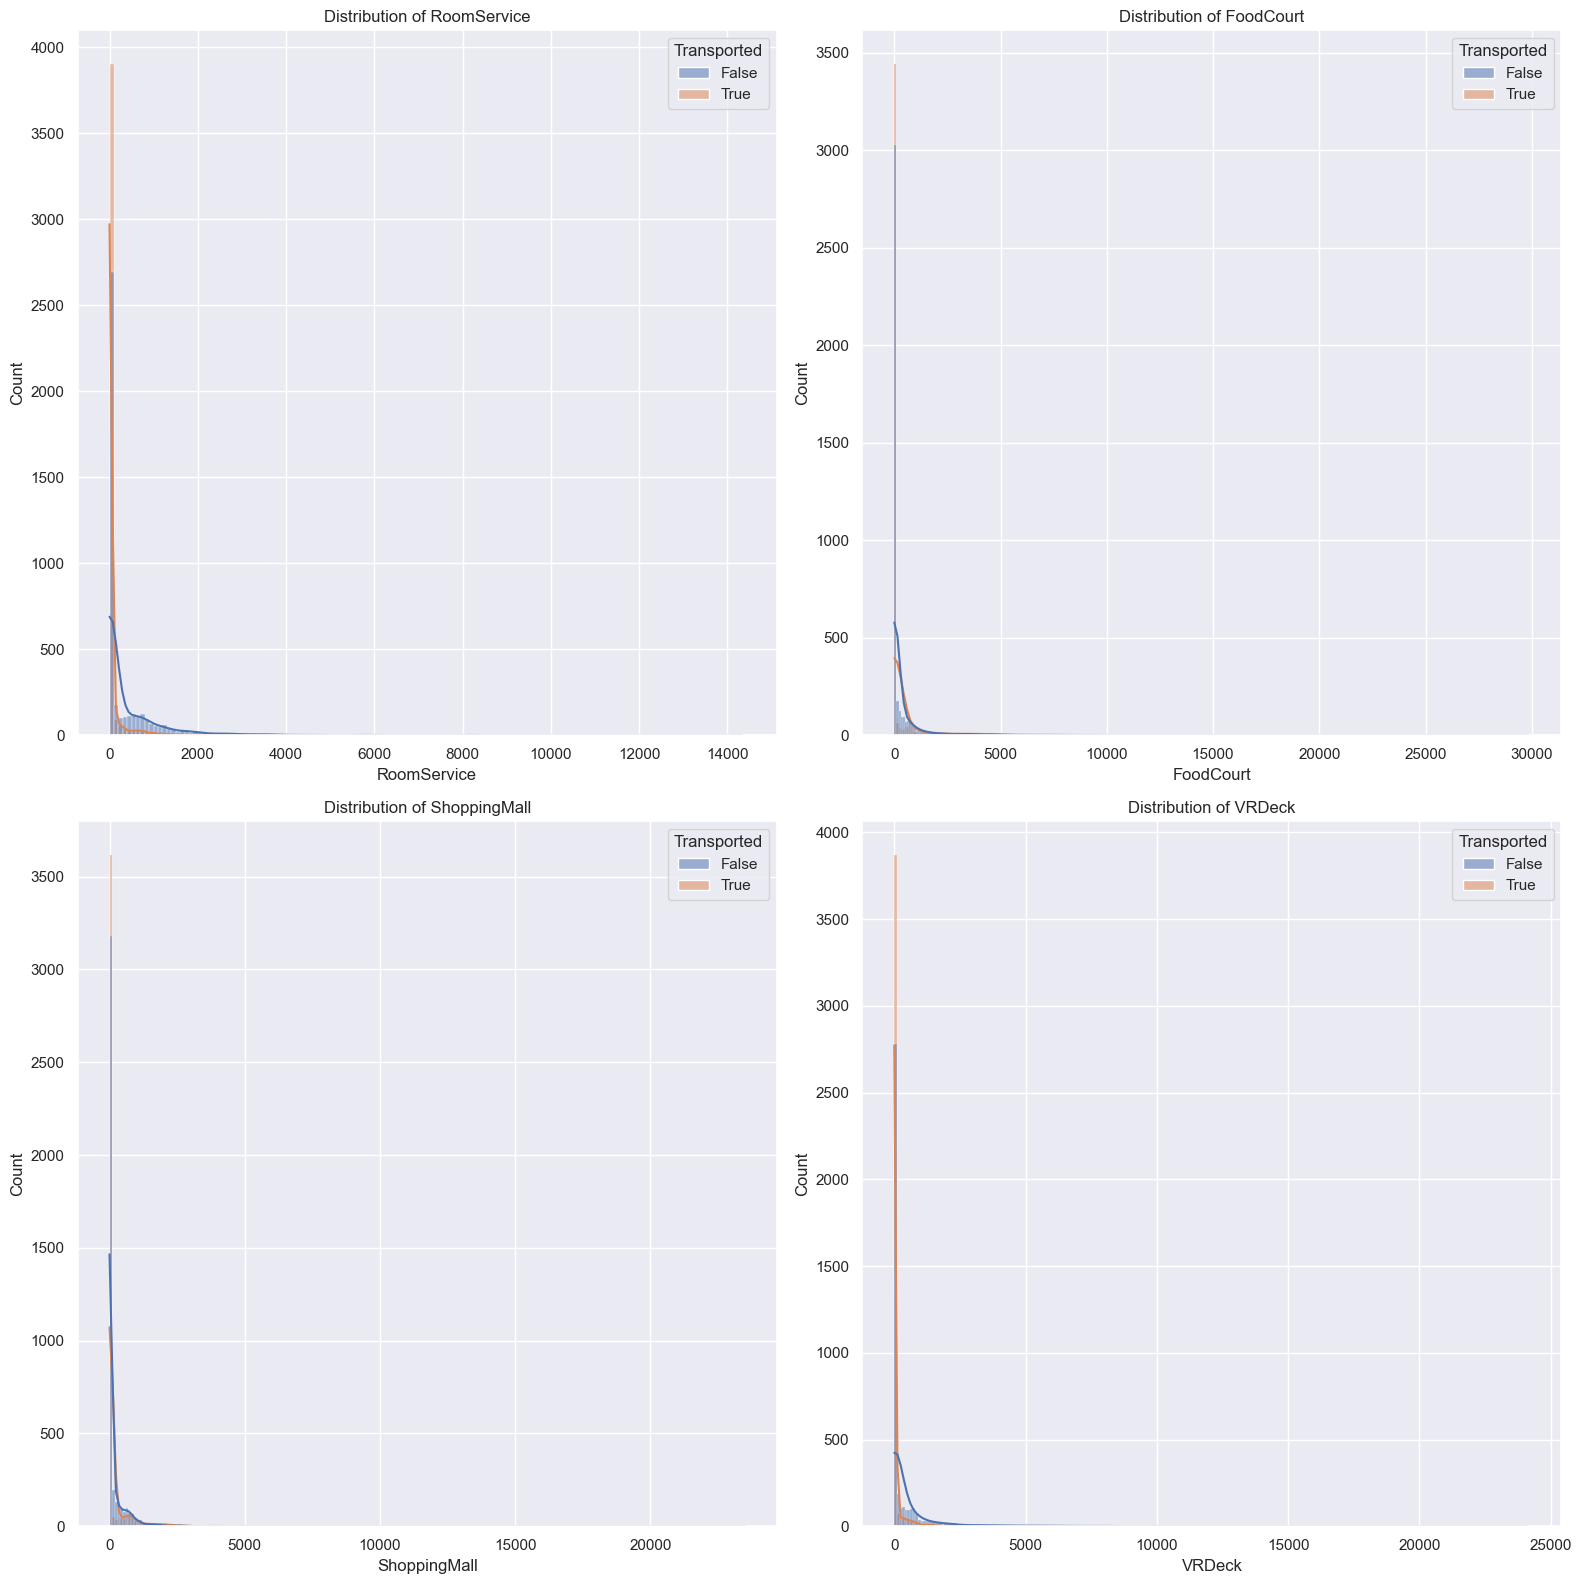

In [57]:
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']

fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for feature, ax in zip(features, axes.flatten()):
    sns.histplot(data=train, x=feature, hue='Transported', binwidth=100, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
fig.tight_layout()
plt.show()

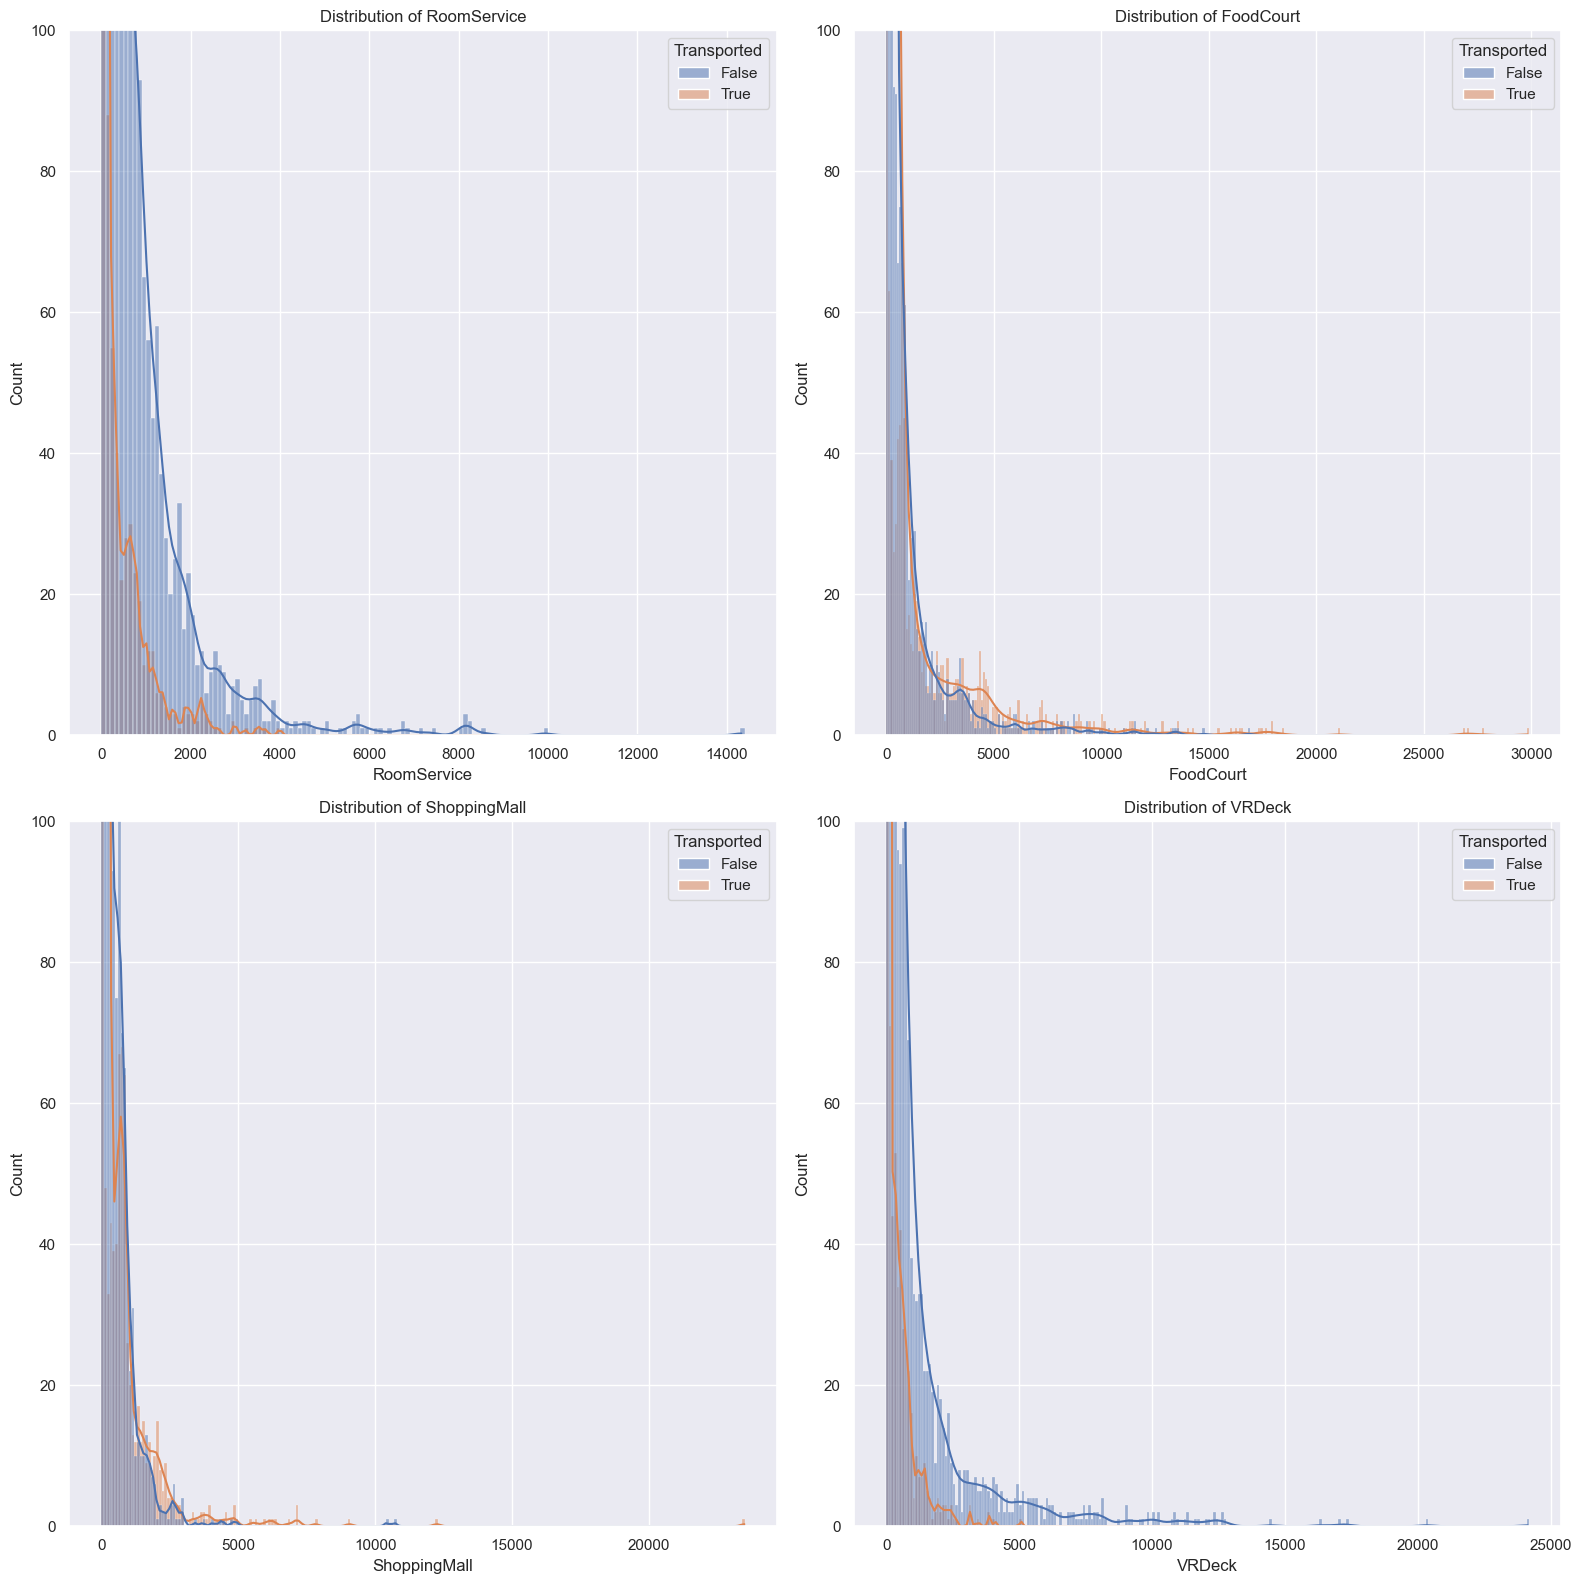

In [58]:
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']

fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for feature, ax in zip(features, axes.flatten()):
    sns.histplot(data=train, x=feature, hue='Transported', binwidth=100, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_ylim([0,100])
    
fig.tight_layout()
plt.show()

Berdasarkan hasil dari histogram tersebut dapat disimpulkan bahwa semakin sedikit seorang passager mengelurkan uang untuk biaya 'RoomService', 'FoodCourt', 'ShoppingMall', maupun 'VRDeck' maka semakin kecil kemungkinan passager tersebut untuk ter transported

In [59]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Saya mengasumsikan bahwa orang orang yang memiliki nama marga yang sama berasal dari keluarga yang sama dan itu berarti merka berasal dari HomePlanet yang sama

In [60]:
# Step 1: Extract last names (marga) from the 'Name' column
train['LastName'] = train['Name'].str.split().str[-1]

# Step 2: Create a mapping of LastName to HomePlanet only from rows where HomePlanet is not NaN
marga_planet_mapping = (
    train[['LastName', 'HomePlanet']]
    .dropna()  # Exclude rows where HomePlanet is NaN
    .groupby('LastName')['HomePlanet']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)  # Get the most common planet
)

# Step 3: Impute HomePlanet for rows where it is NaN based on LastName
def impute_homeplanet_nan_only(row):
    if pd.isnull(row['HomePlanet']):  # Only process rows with NaN in HomePlanet
        return marga_planet_mapping.get(row['LastName'], row['HomePlanet'])  # Return mapped planet if exists
    return row['HomePlanet']

train['HomePlanet'] = train.apply(impute_homeplanet_nan_only, axis=1)

train.isnull().sum()

PassengerId       0
HomePlanet       15
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
LastName        200
dtype: int64

Dapat dilihat bahwa masih ada value yang benilai Nan pada HomePlanet (15 value) maka saya akan mengisinya saja dengan nilai modus

In [61]:
homeplanet_mode = train['HomePlanet'].mode()[0]  # Calculate the mode
train['HomePlanet'].fillna(homeplanet_mode, inplace = True)

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
LastName        200
dtype: int64

Saya mengasumsikan bahwa jika value pada 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck' bernilai 0 maka orang tersebut menggunakan CryoSleep karena seseorang yang sdang di CryoSleep tidak bisa menggunakan fasilitas yang ada dan jika terdapat riwayat penggunaan fasilitas maka status CryoSleepnya adalah false.

In [62]:
expenditure_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Spa']

# Impute CryoSleep with True if all expenditure columns are 0
train.loc[
    (train['CryoSleep'].isnull()) & (train[expenditure_columns].sum(axis=1) == 0),
    'CryoSleep'
] = True

train.loc[
    (train['CryoSleep'].isnull()) & (train[expenditure_columns].sum(axis=1) != 0),
    'CryoSleep'
] = False

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
LastName        200
dtype: int64

saya mengasumsikan bahwa passager akan berada di cabin yang sama apabila destinationnya sama

In [63]:
# Step 1: Create a mapping of Destination to the most frequent Cabin
destination_cabin_mapping = (
    train[['Destination', 'Cabin']]
    .dropna()  # Exclude rows where Cabin is NaN
    .groupby('Destination')['Cabin']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)  # Get the most common cabin
)

# Step 2: Impute Cabin for rows where it is NaN based on Destination
def impute_cabin_nan_based_on_destination(row):
    if pd.isnull(row['Cabin']):  # Only process rows with NaN in Cabin
        return destination_cabin_mapping.get(row['Destination'], row['Cabin'])  # Return mapped cabin if exists
    return row['Cabin']

train['Cabin'] = train.apply(impute_cabin_nan_based_on_destination, axis=1)

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             4
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
LastName        200
dtype: int64

In [64]:
# Saya mengisi value dari cabin yang masih NaN dengan nilai modus
cabin_mode = train['Cabin'].mode()[0]
train['Cabin'].fillna(cabin_mode, inplace=True)

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
LastName        200
dtype: int64

Saya mengasumsikan bahwa jika seseorang berapa pada cabin yang sama, berarti destinationnya sama

In [65]:
cabin_destination_mapping = (
    train[['Cabin', 'Destination']]
    .dropna()
    .groupby('Cabin')['Destination']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
)

def impute_destination_nan_based_on_cabin(row):
    if pd.isnull(row['Destination']):  
        return cabin_destination_mapping.get(row['Cabin'], row['Destination'])
    return row['Destination']

train['Destination'] = train.apply(impute_destination_nan_based_on_cabin, axis=1)

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination     126
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
LastName        200
dtype: int64

### Destination

In [66]:
destination_mode = train['Destination'].mode()[0]
train['Destination'].fillna(destination_mode, inplace=True)

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
LastName        200
dtype: int64

### Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

Saya mengisi semua nilai numerical dengan nilai rata rata (mean)

In [67]:
listNumerical = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in listNumerical:
    train[col].fillna(train[col].mean(), inplace=True)

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
LastName        200
dtype: int64

### VIP

Saya mengisi nilai VIP dengan modus 

In [68]:
vip_mode = train['VIP'].mode()[0]
train['VIP'].fillna(vip_mode, inplace=True)

train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
LastName        200
dtype: int64

### Name dan Last Name

Saya drop name dan LastName karena sudah tidak terpakai. Data ini sudah digunakan secara maksimal saat mengisi nilai NaN pada HomePlanet

In [69]:
train.drop(columns=['Name', 'LastName'], inplace=True)

In [70]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Datanya sudah bersih dari NaN value, kita bisa lanjut ke langkah selanjutnya yaitu PreProcessing

## **PreProcessing**

In [71]:
from sklearn.preprocessing import StandardScaler,LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [72]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Saya melakukan Encoding pada data Kategorikal dan melakukan Standarisasi pada data Numerical kecuali Age

In [73]:
label_encoder = LabelEncoder()

train['PassengerId'] = label_encoder.fit_transform(train['PassengerId'])
train['HomePlanet'] = label_encoder.fit_transform(train['HomePlanet'])
train['CryoSleep'] = label_encoder.fit_transform(train['CryoSleep'])
train["Cabin"] = label_encoder.fit_transform(train['Cabin'])
train['Destination'] = label_encoder.fit_transform(train['Destination'])
train['VIP'] = label_encoder.fit_transform(train['VIP'])
train["Transported"] = label_encoder.fit_transform(train['Transported'])


In [74]:
numerical = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scaler = StandardScaler()
train[numerical] = scaler.fit_transform(train[numerical])

In [75]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,0,149,2,39.0,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0
1,1,0,0,2184,2,24.0,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1
2,2,1,0,1,2,58.0,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0
3,3,1,0,1,2,33.0,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,0
4,4,0,0,2186,2,16.0,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1


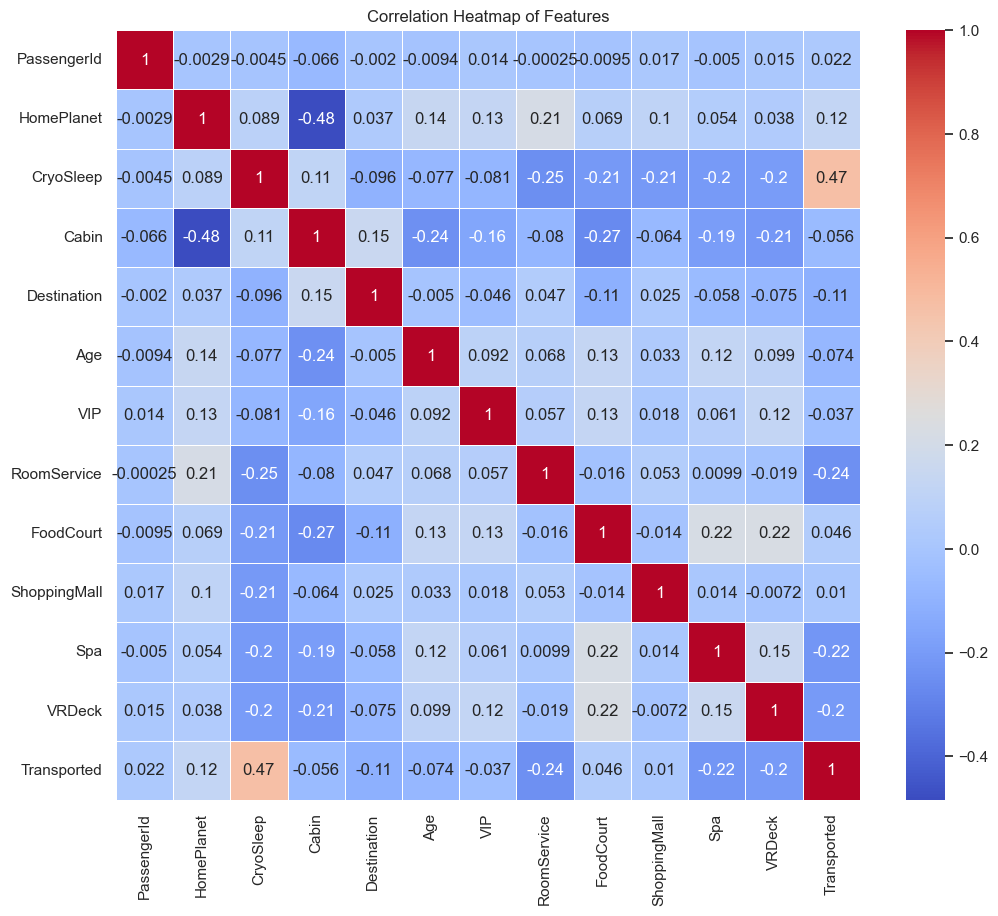

In [76]:
corr_matrix = train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Berdasarkan data Heatmap tersebut dapat disimpulkan bahwa CryoSleep merupakan faktor terbesar yang mempengaruhi label (Transported)

Bagi data menjadi data Training dan data Testing

In [77]:
X = train.drop('Transported', axis=1)
y = train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (6954, 12)
Testing features shape: (1739, 12)
Training labels shape: (6954,)
Testing labels shape: (1739,)


## **Modeling**

In [78]:
# Daftar model yang akan diuji
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

# Menginisialisasi hasil evaluasi
model_scores = []

# Melakukan split data menjadi training dan testing set dengan random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih dan mengevaluasi setiap model
for name, model in models:
    # Melatih model
    model.fit(X_train, y_train)
    
    # Prediksi menggunakan data test
    y_pred = model.predict(X_test)
    
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    
    # Menghitung metrik lainnya (precision, recall, f1-score) menggunakan classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Mengambil nilai precision, recall, f1-score untuk rata-rata makro (macro avg)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Menyimpan hasil
    model_scores.append((name, acc, precision, recall, f1_score))

# Menampilkan hasil perbandingan
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Mengurutkan berdasarkan F1 Score (atau metrik lainnya)
best_models = model_scores_df.sort_values(by='F1 Score', ascending=False).head(4)

# Menampilkan 4 model terbaik
print(best_models)


                 Model  Accuracy  Precision    Recall  F1 Score
3              XGBoost  0.792409   0.792540  0.792508  0.792408
2        Random Forest  0.784359   0.784375  0.784400  0.784356
0  Logistic Regression  0.763657   0.765429  0.763236  0.763051
5          Naive Bayes  0.699827   0.749476  0.697617  0.682613
